In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sentence_transformers import SentenceTransformer

In [8]:
# Load the preprocessed training data and provided test data
train_data = pd.read_csv('a3_train.csv', header=None)
test_data = pd.read_csv("a3_test.tsv", sep="\t", header=None)

train_data

,0,1
0,1,I'll only consume if I know what's inside it....
1,0,It is easier to fool a million people than it...
2,0,NATURAL IMMUNITY protected us since evolutio...
3,1,NATURAL IMMUNITY protected us since evolutio...
4,0,"Proud to have resisted. Proud of my husband, ..."
...,...,...
48505,0,🤣 keep your 💩 I already know 3 people who have...
48506,0,"🤣🤣🤣 ""JUST BECAUSE IT'S SAFE, DOESN'T MEAN IT D..."
48507,0,🤣🤣🤣 I took the Vaccine because of work. If I d...
48508,0,🤨there's people already having severe side eff...


In [9]:
# Split the data into features and labels
Xtrain, Ytrain = train_data[1], train_data[0]
Xtest, Ytest = test_data[1], test_data[0]

In [10]:
# Load a pre-trained SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L12-v2')

# Encode the training and testing texts into embeddings
train_embeddings = model.encode(Xtrain.tolist(), show_progress_bar=True)
test_embeddings = model.encode(Xtest.tolist(), show_progress_bar=True)

Batches:   0%|          | 0/1516 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

In [11]:
# Train SVC model
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(train_embeddings, Ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [36]:
# Predict the test data
Ypred = clf.predict(test_embeddings)

# Evaluate the model
print(f"Accuracy score: {accuracy_score(Ytest, Ypred)}")
print(classification_report(Ytest, Ypred))

Accuracy score: 0.8783717508582638
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1020
           1       0.90      0.85      0.88      1019

    accuracy                           0.88      2039
   macro avg       0.88      0.88      0.88      2039
weighted avg       0.88      0.88      0.88      2039



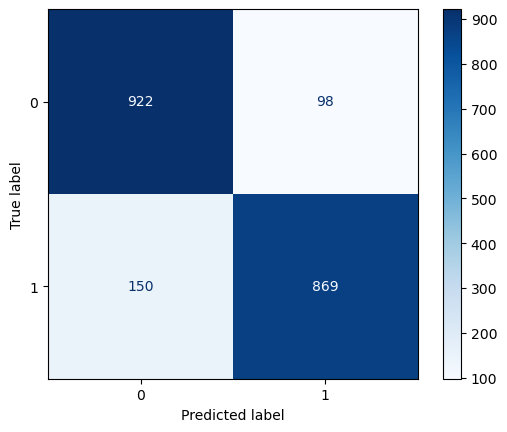

In [37]:
# Plot the confusion matrix
cm = confusion_matrix(Ytest, Ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.show()

In [40]:
# Misclassified examples
misclassified = np.where(Ytest != Ypred)

# Sample a few misclassified examples
misclassified_sample = np.random.choice(misclassified[0], 5)

for i in misclassified_sample:
    print(f"True label: {Ytest[i]}, Predicted label: {Ypred[i]}")
    print(f"Text: {Xtest[i]}\n")

True label: 0, Predicted label: 1
Text: You don't need to take a vaccine for the measles all you have to do is treat it my family we all had measles as kids we didn't go to the doctor to have a shot for the measles all we did is get some calamine lotion put it on took care of the itching and after so many days the virus was gone two weeks and I was back in school

True label: 1, Predicted label: 0
Text: Who else DIDN’T suffer severe side effects from getting the COVID vaccine?

True label: 1, Predicted label: 0
Text: Lasts 3 times longer than natural immunity, wow, this is amazing progress

True label: 0, Predicted label: 1
Text: This is like someone jumping into a giant fire pit and then screaming to others, “come on in, the fire is nice!“

True label: 0, Predicted label: 1
Text: I was gonna get it until a close friend of mine got the first dose & almost died so I’m good thank you

